# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Yoga Ramadan]
- **Email:** [yoga.ramadan@mhs.itenas.ac.id]
- **ID Dicoding:** [yogaramanakit025]

## Menentukan Pertanyaan Bisnis

1. Penyewaan sepeda paling banyak atau paling sedikit, dihari pekan dan liburan atau dihari kerja?

2. Penyewaan sepeda lebih banyak pada tahun pertama atau pada tahun kedua?

3. Penyewaan sepeda paling banyak atau paling sedikit, dilakukan pada jam berapa?

## Import Semua Packages/Library yang Digunakan

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Selanjutnya kita akan mengambil datanya dari file csv yang telah disiapkan dengan bantuan library pandas, disini saya menyiapkan dua data dengan nama day.csv dan hour.csv.

In [4]:
import pandas as pd

Kemudian saya juga mencoba untuk menampilkan data, yaitu 10 data pertama, untuk mengecek data dengan nama day.csv dan hour.csv terpanggil dengan baik atau tidak

In [5]:
day_df = pd.read_csv("day.csv")
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [6]:
hour_df = pd.read_csv("hour.csv")
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


Dan ternyata kita sudah berhasil menampilkan data dari kedua data csv yang kita punya

### Assessing Data

Tahap selanjutnya kita akan menilai, apakah data day.csv ini sudah baik atau belum, dan ternyata berdasarkan yang saya amati, terdapat column yang harus diperbaiki yaitu column dteday dimana Dtypenya adalah objek, yang seharusnya/sebaiknya dteday ini berupa datetime.

In [7]:
# @title Menilai Tabel Data Day.csv

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kemudian kita juga coba cek apakah ada missing value atau tidak, dan ternyata kita tidak menemukan missing value

In [10]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tahap selanjutnya kita coba cek, apakah ada data yang duplikat atau tidak, dan ternyata tidak ada data yang duplikat

In [13]:
print("Duplikasi: ", day_df.duplicated().sum())

Duplikasi:  0


Selanjutnya kita memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df

In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kemudian kita akan melakukan tahap-tahap yang seperti yang telah kita lakukan untuk data day.csv, kita akan lakukan juga kepada data hour.csv, dan ternyata sama seperti day.csv, hour disini juga harus diganti dtype dari column dteday menjadi dtetime

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Tidak lupa kita juga coba cek, apakah ada missing value atau tidak, dan ternyata tidak ada

In [14]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terakhir duplikasi, dan ternyata tidak ada duplikasi

In [15]:
print("Duplikasi: ", hour_df.duplicated().sum())

Duplikasi:  0


Selanjutnya adalah proses cleaning data, pada tahap sebelumnya kita sudah mencoba cek dan mencari tahu apakah ada data yang harus kita cleaning atau tidak, tetapi sepertinya data baik dari day.csv ataupun hour.csv bisa dibilang cukup baik, hanya ada sedikit yang harus kita perbaiki, yaitu dtype dari column dteday.

### Cleaning Data

Disini kita akan coba perbaiki dulu dtype colum dteday dari data day_df menjadi datetime

In [16]:
change_to_datetime = ['dteday']

for column in change_to_datetime:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kemudian kita juga akan memperbaiki untuk hour_df

In [17]:
change_to_datetime = ['dteday']

for column in change_to_datetime:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

Setelah data sudah dicleaning, maka data sudah siap untuk kita eksplor

### Explore ...

In [18]:
day_df.describe(include="all")

<ipython-input-18-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Disini saya akan mengambil sample data sebanyak 10 data untuk day_df.

In [19]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
675,676,2012-11-06,4,1,11,0,2,1,1,0.280833,0.281567,0.567083,0.173513,466,5220,5686
203,204,2011-07-23,3,0,7,0,6,0,1,0.849167,0.804287,0.500000,0.131221,987,2298,3285
339,340,2011-12-06,4,0,12,0,2,1,3,0.462500,0.456400,0.949583,0.232583,126,2468,2594
503,504,2012-05-18,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817,1521,6118,7639
512,513,2012-05-27,2,1,5,0,0,0,1,0.690000,0.641425,0.697083,0.215171,3283,3308,6591
205,206,2011-07-25,3,0,7,0,1,1,1,0.743333,0.720958,0.757083,0.090808,568,3272,3840
605,606,2012-08-28,3,1,8,0,2,1,1,0.728333,0.666050,0.620000,0.190925,935,6105,7040
625,626,2012-09-17,3,1,9,0,1,1,2,0.580833,0.553050,0.734583,0.151742,1022,5847,6869
282,283,2011-10-10,4,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514,3603,5117
274,275,2011-10-02,4,0,10,0,0,0,2,0.356667,0.345317,0.791667,0.222013,616,2302,2918


In [20]:
hour_df.describe(include="all")

<ipython-input-20-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Kemudian saya juga mengambil sample 10 data untuk hour_df

In [21]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12736,12737,2012-06-19,2,1,6,21,0,2,1,1,0.76,0.7121,0.62,0.1642,37,239,276
4309,4310,2011-07-03,3,0,7,11,0,0,0,1,0.76,0.7121,0.62,0.1045,215,175,390
10686,10687,2012-03-26,2,1,3,9,0,1,1,1,0.46,0.4545,0.47,0.2836,37,245,282
868,869,2011-02-08,1,0,2,15,0,2,1,1,0.22,0.1970,0.35,0.3881,6,45,51
10046,10047,2012-02-28,1,1,2,15,0,2,1,1,0.42,0.4242,0.26,0.0896,17,149,166
1447,1448,2011-03-05,1,0,3,14,0,6,0,2,0.48,0.4697,0.59,0.2836,80,118,198
4233,4234,2011-06-30,3,0,6,7,0,4,1,1,0.62,0.6061,0.61,0.2239,29,291,320
11254,11255,2012-04-19,2,1,4,3,0,4,1,2,0.42,0.4242,0.77,0.0000,1,3,4
5491,5492,2011-08-21,3,0,8,17,0,0,0,1,0.72,0.6970,0.79,0.1343,91,179,270
7513,7514,2011-11-14,4,0,11,16,0,1,1,1,0.62,0.6212,0.46,0.4179,51,264,315


Kemudian saya mencoba untuk menggabungkan kedua data, yang kemudian data inilah yang akan kita pakai, pada projek analisis kali ini

In [22]:
day_and_hour_df = day_df.merge(hour_df, on='dteday', how='inner', suffixes=('_d', '_h'))

Disini saya mencoba menampilkan 5 data awal dari data yang telah kita gabungkan sebelumnya

In [23]:
day_and_hour_df.head()

,instant_d,dteday,season_d,yr_d,mnth_d,holiday_d,weekday_d,workingday_d,weathersit_d,temp_d,...,weekday_h,workingday_h,weathersit_h,temp_h,atemp_h,hum_h,windspeed_h,casual_h,registered_h,cnt_h
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Pertama disini kita ingin mencari tahu, perbandingan dari penyewaan sepeda dari hari pekan dan liburan, dengan dihari kerja.

In [25]:
day_and_hour_df.groupby('workingday_d')['cnt_d'].max().reset_index()

,workingday_d,cnt_d
0,0,8714
1,1,8362


disini kita akan mencari tahu dengan cara melihat jumlah count berdasarkan column yang ada di workingday_d, berdasarkan README dari data yang saya pakai, bahwasanya 0 adalah hari pekan dan liburan, sedangkan 1 untuk hari kerja

In [38]:
workday_or_weekend = {
    0: 'Weekend_and_Holiday',
    1: 'Workday'

}

day_and_hour_df['workday_or_weekend'] = day_and_hour_df['workingday_d'].map(workday_or_weekend)
day_and_hour_df.groupby('workday_or_weekend')['cnt_d'].max().reset_index()


,workday_or_weekend,cnt_d
0,Weekend_and_Holiday,8714
1,Workday,8362


Agar lebih jelas, saya akan memberikan keterangan untuk 0 = weekend_and_holiday, dan 1 = workday.:

Kemudian disini saya ingin mencari tahu perbandingan penyewaan sepeda ditahun pertama dengan tahun kedua, dengan cara memanggil cnt_d berdasarkan column yr_d

In [27]:
day_and_hour_df.groupby('yr_d')['cnt_d'].max().reset_index()

,yr_d,cnt_d
0,0,6043
1,1,8714


Dari informasi README yang saya dapatkan, bahwasanya 0 itu adalah untuk tahun pertama / 2011, dan 1 itu untuk tahun kedua, untuk itu saya akan kembali menambahkan lebel agar lebih jelas

In [28]:
tahun = {
    0: 'Tahun 2011',
    1: 'Tahun 2012'

}

day_and_hour_df['tahun'] = day_and_hour_df['yr_d'].map(tahun)
day_and_hour_df.groupby('tahun')['cnt_d'].max().reset_index()

,tahun,cnt_d
0,Tahun 2011,6043
1,Tahun 2012,8714


In [30]:
jam = {
    0: ' 00:00',
    1: ' 01:00',
    2: ' 02:00',
    3: '03:00',
    4: '04:00',
    5: '05:00',
    6: '06:00',
    7: '07:00',
    8: 'J08:00',
    9: '09:00',
    10: '10:00',
    11: '11:00',
    12: '12:00',
    13: '13:00',
    14: '14:00',
    15: '15:00',
    16: '16:00',
    17: '17:00',
    18: '18:00',
    19: '19:00',
    20: '20:00',
    21: '21:00',
    22: '22:00',
    23: '23:00',
}

day_and_hour_df['jam'] = day_and_hour_df['hr'].map(jam)
day_and_hour_df.groupby('jam')['cnt_h'].max().reset_index().sort_values('cnt_h')

,jam,cnt_h
4,Jam 04:00,28
5,Jam 05:00,66
3,Jam 03:00,79
2,Jam 02:00,132
1,Jam 01:00,168
6,Jam 06:00,213
23,Jam 23:00,256
0,Jam 00:00,283
9,Jam 09:00,426
22,Jam 22:00,502


## Visualization & Explanatory Analysis



```
# Ini diformat sebagai kode
```

### Pertanyaan 1: Penyewaan sepeda paling banyak atau paling sedikit, dihari pekan dan liburan atau dihari kerja?

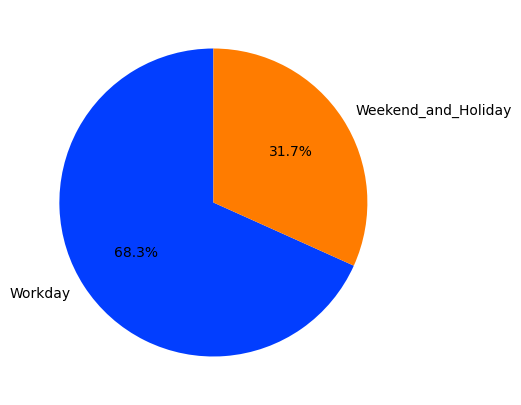

In [39]:
plt.figure(figsize=(5, 5))

perbandingan_hari = day_and_hour_df['workday_or_weekend'].value_counts()
plt.pie(perbandingan_hari, labels=perbandingan_hari.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright', len(perbandingan_hari)))

plt.show()

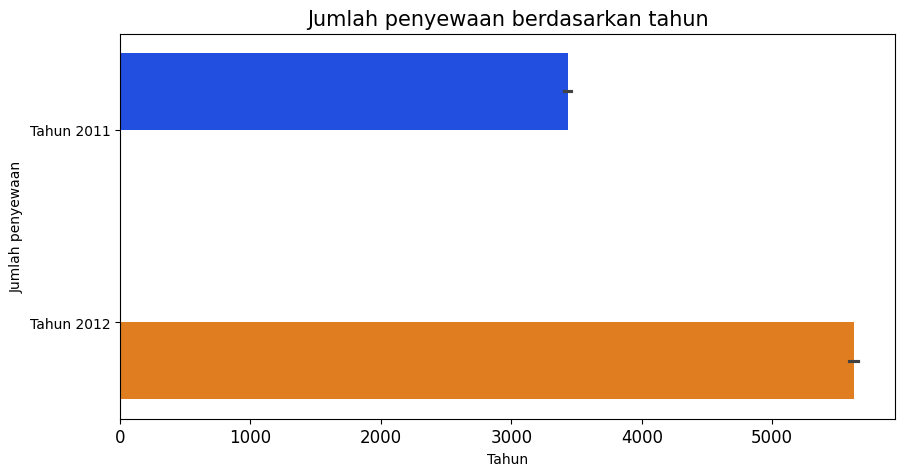

In [35]:
# @title Pertanyaan 2: Penyewaan sepeda lebih banyak pada tahun pertama atau pada tahun kedua?
plt.figure(figsize=(10, 5))

sns.barplot(
    y="tahun",
    x="cnt_d",
    data=day_and_hour_df,
    hue='tahun',
    dodge='False',
    palette='bright'
)
plt.title("Jumlah penyewaan berdasarkan tahun", loc="center", fontsize=15)
plt.ylabel('Jumlah penyewaan')
plt.xlabel('Tahun')
plt.tick_params(axis='x', labelsize=12)
plt.show()

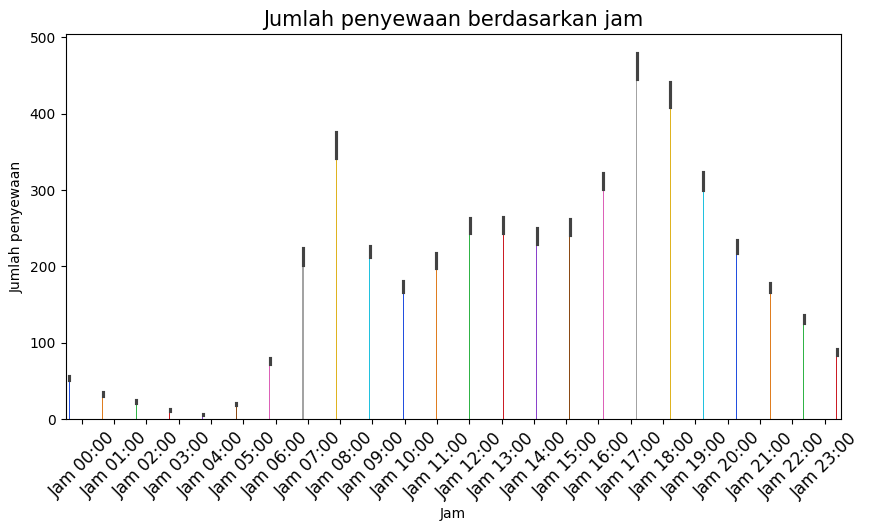

In [36]:
# @title Pertanyaan 3: Penyewaan sepeda paling banyak atau paling sedikit, dilakukan pada jam berapa?
plt.figure(figsize=(10, 5))

sns.barplot(
    y="cnt_h",
    x="jam",
    data=day_and_hour_df,
    hue='jam',
    dodge='False',
    palette='bright'
)
plt.title("Jumlah penyewaan berdasarkan jam", loc="center", fontsize=15)
plt.ylabel('Jumlah penyewaan')
plt.xlabel('Jam')
plt.xticks(rotation=45)
plt.tick_params(axis='x', labelsize=12)
plt.show()



## Conclusion

1. Penyewaan sepeda paling banyak atau paling sedikit, dihari pekan dan liburan atau dihari kerja?

Konklusi:
Berdasarkan data dan grafik yang kita peroleh diatas, bahwasanya penyewaan sepeda lebih banyak dilakukan pada hari workday secara total, dengan selisih kurang lebih 30%

2. Penyewaan sepeda lebih banyak pada tahun pertama atau pada tahun kedua?

Konklusi:
  Berdasarkan data yang kita peroleh, ternyata pada tahun kedua atau pada tahun 2012 jumlah penyewaan sepeda naik secara drastis, dibandingkan tahun sebelumnya atau tahun 2011

3. Penyewaan sepeda paling banyak atau paling sedikit, dilakukan pada jam berapa?

Konklusi:
Berdasarkan data yang dapat kita peroleh, bahwasanya penyewaan sepeda paling sedikit terjadi pada pukul 04:00, sedangkan penyewaan sepeda terbanyak terjadi pada pukul 18:00.